# Multiple Linear Regression on CBC dataset
Here we explore the use of multiple linear regression algorithm on the leukemia CBC dataset. 

## Workflow 
The workflow here is the following: 

1. Load the CBC dataset and visualize the dataset with the `pandas` and `seaborn` libraries. 
2. Try to see which of the given given columns can have linear relationships with each other. 
3. Choose the columns that are visually linear and apply multiple linear regression with the `sklearn.linear_model` package. 
4 See how well the algorithm predicts new values wtih the `sklearn.metrics` module

## Step 1: Loading up the data
The following blocks are purely to import the necessary libraries used in this project. 

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow import keras

from pandas.plotting import scatter_matrix
from scipy import stats


In [7]:
def load_data(data_dir): 
    """Load the data via pandas"""
    return pd.read_csv(data_dir)


In [8]:
def encode_data(cancer_data, cancer_data_column): 
    """The categorical columns need to be encoded into numerical values."""
    
    label_encoder = LabelEncoder()
    return label_encoder.fit_transform(cancer_data[cancer_data_column])



In [9]:
def choose_linear_columns(cancer_data):
    """From the cancer dataset, only choose the linearly distributed attributes."""
    
    linear_columns = ["RBC", "Haemoglbin", "Platelet_Count", "SUBTYPES.Bin"]
    return cancer_data[linear_columns]


/home/nadzhou/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/nadzhou/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


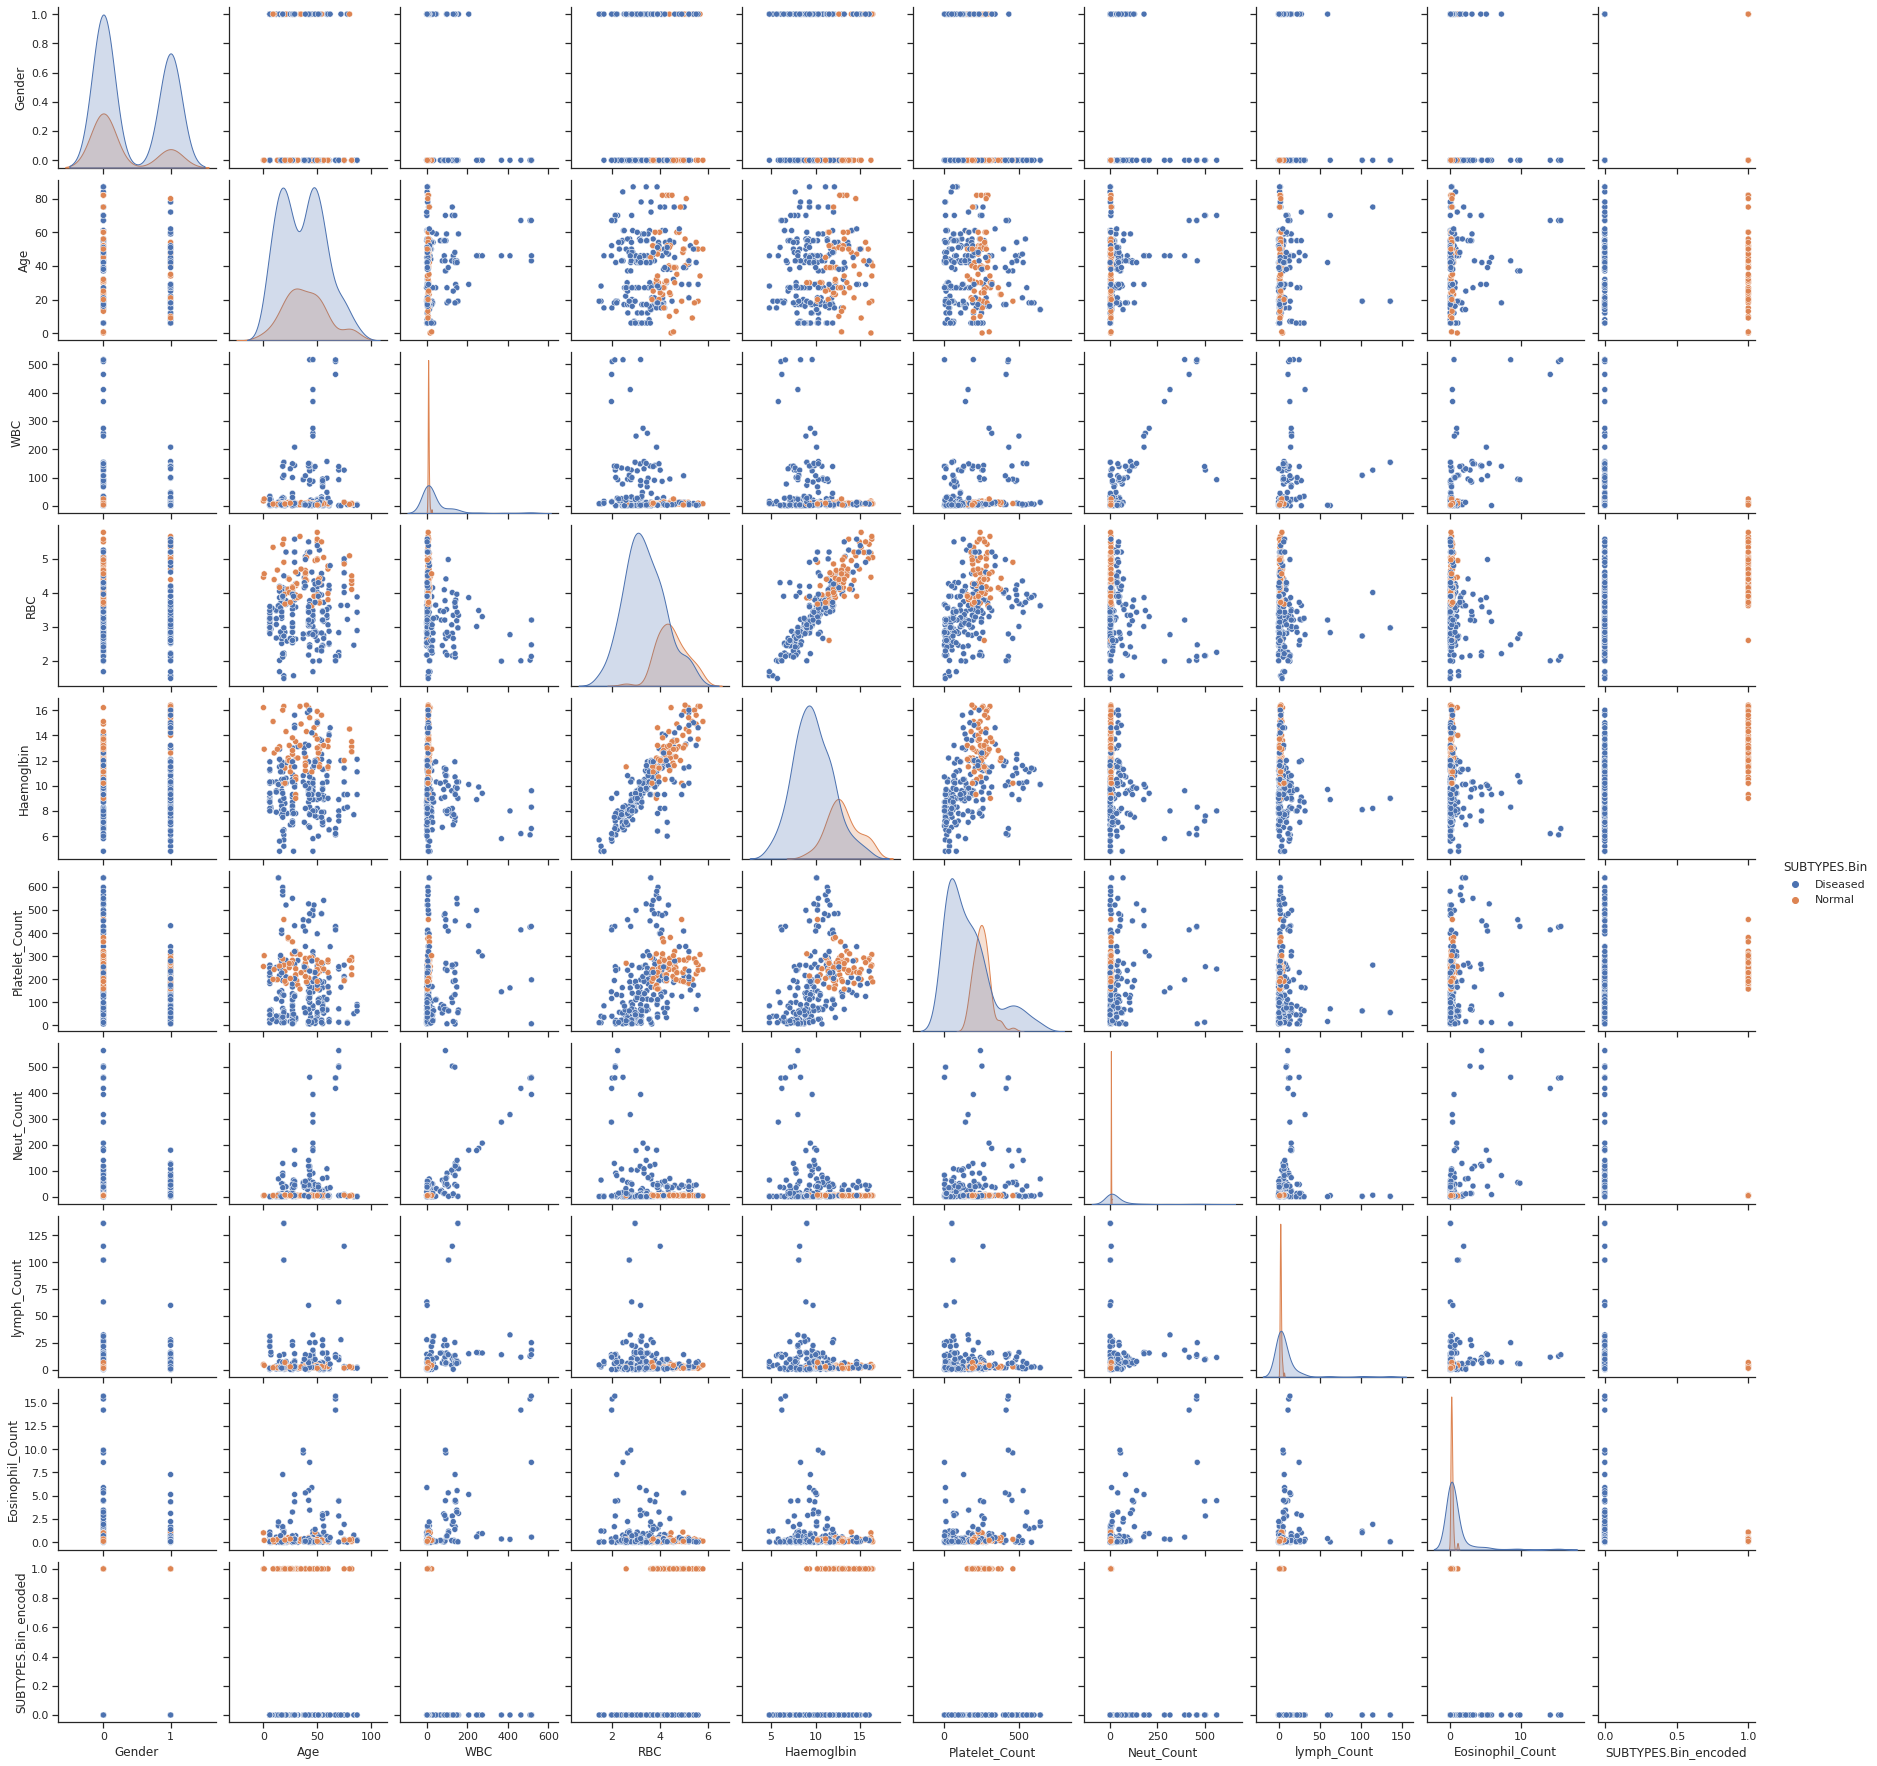

In [11]:
cancer_data = load_data("/home/nadzhou/Downloads/cancer_data.csv")
cancer_data['Gender'] = encode_data(cancer_data, "Gender")
cancer_data['SUBTYPES.Bin_encoded'] = encode_data(cancer_data, "SUBTYPES.Bin")

sns.set_theme(style="ticks")
sns.pairplot(cancer_data, hue="SUBTYPES.Bin")


## Observation
Just like everything real in life, the graph is complex. But visually we can spot three columns that are linearly distributed along a line: 

1. RBC
2. Haemoglobin
3. Platelet Count 

While Haemoglobin and RBC are correlated from background knowledge: more haemoglobin means more red blood cells, while platelet count isn't very much correlated but seems to be interestingly linearly regressive with respect to both RBC and haemoglobin. 

### Ergo
Therefore we select these three columns for our multiple regression model. 

## Step 2: Choosing the linearly distributed columns. 
We select the columns that we need in this model. We visualize the columns here. 

### Dependent variables
The dependent variable that we choose here are the `RBC` and `Platelet_Count` columns. 

### Independent variable
In this exercise we use the `Haemoglobin` attribute as the main independent variable. 

    RBC  Haemoglbin  Platelet_Count SUBTYPES.Bin
0  2.25         8.0           244.0     Diseased
1  2.82         8.9            38.0     Diseased
2  2.46         7.7            50.0     Diseased
3  2.51         7.7            16.0     Diseased
4  3.66        10.2           522.0     Diseased


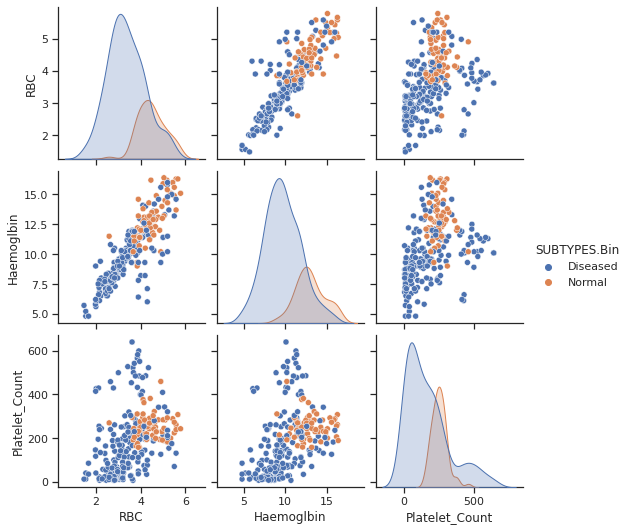

In [14]:
linear_cancer_data = choose_linear_columns(cancer_data)

print(linear_cancer_data.head())

sns.pairplot(linear_cancer_data, hue="SUBTYPES.Bin")
plt.show()

## Step 3: Applying multiple linear regression 
We now apply linear regression and see what is in order. 

In [15]:
from sklearn.linear_model import LinearRegression

def apply_linear_regr(cancer_data): 
    predictor = "Haemoglobin"
    outcome = ["RBC", "Platelet_Count"]
    
    linear_regr = LinearRegression()
    return linear_regr.fit(cancer_data[predictor], cancer_data[outcome])

In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, 

multi_linear_model = apply_linear_regr(linear_cancer_data)
